In [1]:
pwd

'C:\\Users\\user\\OneDrive\\Desktop\\scatter-plotter\\Datacamp'

In [2]:
cd C:\\Users\\user\\OneDrive\\Desktop\\CSV files

C:\Users\user\OneDrive\Desktop\CSV files


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
police = pd.read_csv('police2.csv')
police.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (3,13,14,15,16,17,18,19,20,21,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,raw_row_number,date,time,location,lat,lng,district,zone,subject_age,subject_race,...,frisk_performed,search_conducted,search_person,search_vehicle,search_basis,reason_for_stop,vehicle_color,vehicle_make,vehicle_model,vehicle_year
0,1,2010-01-01,01:11:00,NaN,NaN,NaN,6,E,26.0,black,...,NaN,NaN,NaN,NaN,NaN,TRAFFIC VIOLATION,BLACK,DODGE,CARAVAN,2005.0
1,2,2010-01-01,02:06:00,NaN,NaN,NaN,5,D,17.0,black,...,NaN,NaN,NaN,NaN,NaN,CALL FOR SERVICE,NaN,NaN,NaN,NaN
2,3,2010-01-01,02:06:00,NaN,NaN,NaN,5,D,18.0,black,...,NaN,NaN,NaN,NaN,NaN,CALL FOR SERVICE,NaN,NaN,NaN,NaN
3,4,2010-01-01,02:06:00,NaN,NaN,NaN,5,D,30.0,black,...,NaN,NaN,NaN,NaN,NaN,CALL FOR SERVICE,NaN,NaN,NaN,NaN
4,5,2010-01-01,02:06:00,NaN,NaN,NaN,5,D,21.0,black,...,NaN,NaN,NaN,NaN,NaN,CALL FOR SERVICE,NaN,NaN,NaN,NaN


In [5]:
police.shape

(513065, 30)

In [6]:
police.dtypes

raw_row_number          int64
date                   object
time                   object
location               object
lat                   float64
lng                   float64
district                int64
zone                   object
subject_age           float64
subject_race           object
subject_sex            object
officer_assignment     object
type                   object
arrest_made            object
citation_issued        object
warning_issued         object
outcome                object
contraband_found       object
contraband_drugs       object
contraband_weapons     object
frisk_performed        object
search_conducted       object
search_person          object
search_vehicle         object
search_basis           object
reason_for_stop        object
vehicle_color          object
vehicle_make           object
vehicle_model          object
vehicle_year          float64
dtype: object

In [7]:
police['lng'].value_counts

<bound method IndexOpsMixin.value_counts of 0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
5               NaN
6               NaN
7               NaN
8               NaN
9               NaN
10              NaN
11              NaN
12              NaN
13              NaN
14              NaN
15              NaN
16              NaN
17              NaN
18              NaN
19              NaN
20              NaN
21              NaN
22              NaN
23              NaN
24              NaN
25              NaN
26              NaN
27              NaN
28              NaN
29              NaN
            ...    
513035          NaN
513036   -90.020917
513037   -90.077763
513038   -90.050107
513039   -90.020917
513040   -90.020917
513041   -90.050107
513042   -90.020917
513043   -90.020917
513044   -90.020917
513045   -90.020917
513046          NaN
513047   -90.050107
513048   -90.101281
513049          NaN
513050   -90.020917
513051   -89.991

In [8]:
police.isnull().sum()

raw_row_number             0
date                      10
time                       0
location               96644
lat                   252441
lng                   252441
district                   0
zone                       0
subject_age            13185
subject_race           12127
subject_sex            12127
officer_assignment       124
type                  150149
arrest_made           123349
citation_issued       123349
warning_issued        123349
outcome               177385
contraband_found      437263
contraband_drugs      437263
contraband_weapons    437263
frisk_performed       123349
search_conducted      123349
search_person         123349
search_vehicle        123349
search_basis          437263
reason_for_stop            0
vehicle_color         239498
vehicle_make          236111
vehicle_model         253379
vehicle_year          240697
dtype: int64

In [9]:
# remove the columns that only contains missing value
police.drop('lat',axis=1,inplace = True)

In [10]:
police.shape

(513065, 29)

In [11]:
police.dropna(axis=1,how = 'all').shape

(513065, 29)

In [12]:
police['reason_for_stop'].value_counts(normalize = True)

TRAFFIC VIOLATION         0.570764
CALL FOR SERVICE          0.138604
SUSPECT PERSON            0.124795
CRIMINAL VIOLATION        0.058747
OTHER                     0.047924
CITIZEN CONTACT           0.030977
SUSPECT VEHICLE           0.011790
FLAGGED DOWN              0.008769
JUVENILE VIOLATION        0.006085
PRESENT AT CRIME SCENE    0.001546
Name: reason_for_stop, dtype: float64

In [13]:
police[police.reason_for_stop =='CRIMINAL VIOLATION'].subject_sex.value_counts()

male      24040
female     5977
Name: subject_sex, dtype: int64

In [14]:
police[police.subject_sex =='male'].reason_for_stop.value_counts(normalize = True)

TRAFFIC VIOLATION         0.526916
SUSPECT PERSON            0.153437
CALL FOR SERVICE          0.136092
CRIMINAL VIOLATION        0.067768
OTHER                     0.051649
CITIZEN CONTACT           0.034338
SUSPECT VEHICLE           0.011950
FLAGGED DOWN              0.009788
JUVENILE VIOLATION        0.006396
PRESENT AT CRIME SCENE    0.001666
Name: reason_for_stop, dtype: float64

In [15]:
police[police.subject_sex =='female'].reason_for_stop.value_counts(normalize = True)

TRAFFIC VIOLATION         0.657524
CALL FOR SERVICE          0.150027
SUSPECT PERSON            0.063379
CRIMINAL VIOLATION        0.040882
OTHER                     0.040554
CITIZEN CONTACT           0.024843
SUSPECT VEHICLE           0.009001
FLAGGED DOWN              0.006642
JUVENILE VIOLATION        0.005793
PRESENT AT CRIME SCENE    0.001354
Name: reason_for_stop, dtype: float64

In [16]:
police.groupby('subject_sex').reason_for_stop.value_counts(normalize = True)

subject_sex  reason_for_stop       
female       TRAFFIC VIOLATION         0.657524
             CALL FOR SERVICE          0.150027
             SUSPECT PERSON            0.063379
             CRIMINAL VIOLATION        0.040882
             OTHER                     0.040554
             CITIZEN CONTACT           0.024843
             SUSPECT VEHICLE           0.009001
             FLAGGED DOWN              0.006642
             JUVENILE VIOLATION        0.005793
             PRESENT AT CRIME SCENE    0.001354
male         TRAFFIC VIOLATION         0.526916
             SUSPECT PERSON            0.153437
             CALL FOR SERVICE          0.136092
             CRIMINAL VIOLATION        0.067768
             OTHER                     0.051649
             CITIZEN CONTACT           0.034338
             SUSPECT VEHICLE           0.011950
             FLAGGED DOWN              0.009788
             JUVENILE VIOLATION        0.006396
             PRESENT AT CRIME SCENE    0.001666
Name

In [17]:
police.search_conducted.mean()

0.19450574264336082

In [18]:
police['search_conducted'].value_counts(normalize = True)

False    0.805494
True     0.194506
Name: search_conducted, dtype: float64

In [21]:
police.search_basis .value_counts()

other             52871
probable cause    12401
consent            5525
plain view         5005
Name: search_basis, dtype: int64

In [24]:
# how often the driver frisked
police.frisk_performed.value_counts()

False    326263
True      63453
Name: frisk_performed, dtype: int64

In [26]:
# which year has the least number of stops
police.date.str.slice(0,4).value_counts()

2011    86577
2015    68778
2012    65299
2010    62005
2017    56348
2014    54649
2016    47820
2013    39394
2018    31588
2009      287
2008      252
2007       51
2004        3
2001        2
2003        1
2002        1
Name: date, dtype: int64

In [27]:
# useful plots
combined = police.date.str.cat(police.time,sep = ' ')
police['stop_datetime'] = pd.to_datetime(combined)

In [30]:
police.dtypes

raw_row_number                 int64
date                          object
time                          object
location                      object
lng                          float64
district                       int64
zone                          object
subject_age                  float64
subject_race                  object
subject_sex                   object
officer_assignment            object
type                          object
arrest_made                   object
citation_issued               object
warning_issued                object
outcome                       object
contraband_found              object
contraband_drugs              object
contraband_weapons            object
frisk_performed               object
search_conducted              object
search_person                 object
search_vehicle                object
search_basis                  object
reason_for_stop               object
vehicle_color                 object
vehicle_make                  object
v

In [32]:
police.stop_datetime.dt.year.value_counts().sort_values()

2003.0        1
2002.0        1
2001.0        2
2004.0        3
2007.0       51
2008.0      252
2009.0      287
2018.0    31588
2013.0    39394
2016.0    47820
2014.0    54649
2017.0    56348
2010.0    62005
2012.0    65299
2015.0    68778
2011.0    86577
Name: stop_datetime, dtype: int64

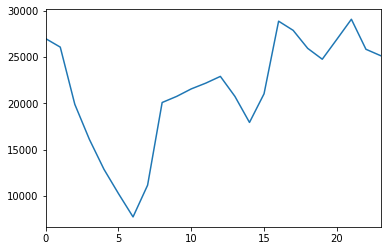

In [35]:
police.stop_datetime.dt.hour.value_counts().sort_index().plot()

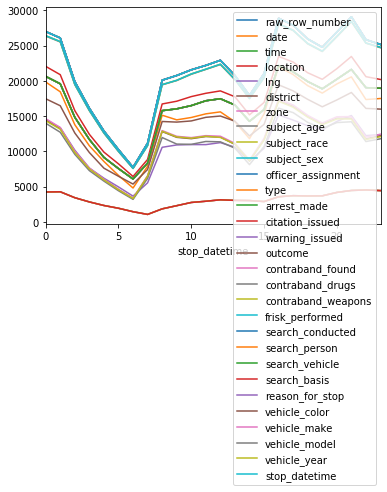

In [36]:
police.groupby(police.stop_datetime.dt.hour).count().plot()